<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/ResNetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
import tensorflow as tf

In [8]:
def bottleneck_residual_block(X,kernel_size,filters,reduce=False,stride_size=2):
  F1,F2,F3 = filters
  x_shortcut = X

  if reduce:
    # Reduce Path for shortcut:
    x_shortcut = Conv2D(filters=F3,kernel_size=(1,1),
                        strides=(stride_size,stride_size))(x_shortcut)
    x_shortcut = BatchNormalization(axis=3)(x_shortcut)
    
    X = Conv2D(filters=F1,kernel_size=(1,1),strides=(stride_size,stride_size),
               padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    x = Activation('relu')(X)
  else: 
    # 1st component of Main Path:
    X = Conv2D(filters=F1,kernel_size=(1,1),strides=(1,1),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
  # 2nd component of Main Path:
  X = Conv2D(filters=F2,kernel_size=kernel_size,strides=(1,1),padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  # 3rd component of Main Path:
  X = Conv2D(filters=F3,kernel_size=(1,1),strides=(1,1),padding='valid')(X)
  X = BatchNormalization(axis=3)(X)

  # Final Step:
  X = Add()([X,x_shortcut])
  X = Activation('relu')(X)

  return X

In [16]:
def ResNet50(input_shape,classes):
  X_input = Input(input_shape)
  
  # 1st Block:
  X = Conv2D(64,(7,7),strides=(2,2),name='conv1')(X_input)
  X = BatchNormalization(axis=3,name='bn_conv1')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3,3),strides=(2,2))(X)

  # 2nd Block:
  X = bottleneck_residual_block(X,3,[64,64,256],reduce=True,stride_size=1)
  X = bottleneck_residual_block(X,3,[64,64,256])
  X = bottleneck_residual_block(X,3,[64,64,256])

  # 3rd Block:
  X = bottleneck_residual_block(X,3,[128,128,512],reduce=True,stride_size=2)
  X = bottleneck_residual_block(X,3,[128,128,512])
  X = bottleneck_residual_block(X,3,[128,128,512])
  X = bottleneck_residual_block(X,3,[128,128,512])

  # 4th Block:
  X = bottleneck_residual_block(X,3,[256,256,1024],reduce=True,stride_size=2)
  X = bottleneck_residual_block(X,3,[256,256,1024])
  X = bottleneck_residual_block(X,3,[256,256,1024])
  X = bottleneck_residual_block(X,3,[256,256,1024])
  X = bottleneck_residual_block(X,3,[256,256,1024])
  X = bottleneck_residual_block(X,3,[256,256,1024])

  # 5th Block:
  X = bottleneck_residual_block(X,3,[512,512,2048],reduce=True,stride_size=2)
  X = bottleneck_residual_block(X,3,[512,512,2048])
  X = bottleneck_residual_block(X,3,[512,512,2048])

  # AVG POOL:
  X = AveragePooling2D((1,1))(X)

  # Output:
  X = Flatten()(X)
  X = Dense(classes,activation='softmax',name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='ResNet50')

  return model

In [18]:
model = ResNet50((224,224,3),275)
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 109, 109, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 109, 109, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 109, 109, 64) 0           bn_conv1[0][0]                   
___________________________________________________________________________________________

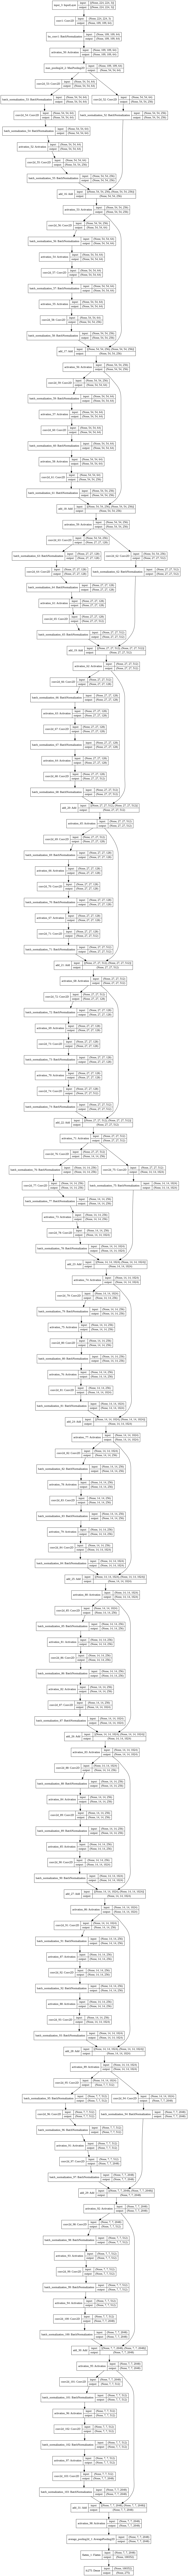

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)